In [0]:
#creating the dataset
import numpy as np # conda install numpy -y
import pandas as pd # conda install pandas -y
import matplotlib.pyplot as plt # conda install matplotlib -y
from skimage.io import imread # conda install scikit-image -y
import os
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
'''
import pickle
#here we store this array of pixels

pickle_out = open("features_pixels_partial.pickle","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

In [0]:
'''
import pickle

pickle_off = open("/content/features_pixels_partial.pickle","rb")
features = pickle.load(pickle_off)
#print(emp)

In [0]:
'''
from sklearn.model_selection import train_test_split
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))

print(y_train[:5])

In [0]:
# SVM model (support vector machine)
# RF model (random forest)
# DT model (decision tree)
# NN model (neural network)
# DNN model (deep neural network)
# CNN model (convolutional neural network)
'''
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(list(X_train), y_train) # Fitting the model

dump(model, 'svm_model_pixels.joblib') # saving model
model = load('svm_model_pixels.joblib') # loading model

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

In [0]:
#classification using histogram as a feature
'''
from skimage import exposure, img_as_float # for histogram

nbins = 256
features = []
for filename in df_part.File:
    im = imread(filename)
    im = img_as_float(im)
    features.append(np.stack([exposure.histogram(im[:,:,0])[0],
                             exposure.histogram(im[:,:,1])[0],
                             exposure.histogram(im[:,:,2])[0]]).flatten())

features = np.array(features)

In [0]:
pickle_out = open("features_hist.pickle","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

In [0]:
'''
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))   

In [0]:
# SVM model
'''
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(X_train, y_train) # Fitting the model

# saving trained model

dump(model, 'svm_model_histogram.joblib')
model = load('svm_model_histogram.joblib')

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()


In [0]:
def dataset1(path,label,outputFileName):
    #function to create the first part of the dataset
    #it returns as output a csv file with the name of the image,label
    i=0
    imgArray = []#array were we will store all our images
    for root, dirs, files in os.walk(path):
        if(i != 0):#here is where we change directory
            print("CHANGED")
        prev_dir = root
        
        for file_ in files:

            img = os.path.join(root, file_)
            #print(np.array(Image.open(img)))
            with open ('C:/Users/aecan/image_Mining/testImages-20200314T175026Z-001/'+outputFileName, 'a',newline = '') as file:
                writer = csv.writer(file)
                #print(path,file_)
                #print(os.path.join(path, file_))
               # print(file
                print(root+file_)
                writer.writerow([os.path.join(root, file_),label[i-1]])
                ##change to  writer.writerow([os.path.join(root, file_),label[i-1]]) if you want just the name of the file
            
        
           # print( os.path.join(root, file_),i )
        i+=1
    return #this is the X inX_train our dataset

In [0]:
import cv2
import PIL
import os
def resize_images(df):
    #THIS FUNCTION RESIZES OUR IMAGES TO 150 * 150 PIXELS
    for i in range(0,len(df)):
      
      filename= os.path.basename(df.loc[i].File)
      if not(os.path.isfile("drive/My Drive/Colab Notebooks/resizedIms/"+filename)):
        print("ENTERING")
        image = PIL.Image.open(df.loc[i].File)
        new_image = image.resize((150, 150))
        #new_image.show()
        print(image.filename)
        filename= os.path.basename(df.loc[i].File)
        #direct = "drive/My Drive/Colab Notebooks/whole_food_datasetColab.csv/resizedIms"+image.name+'.jpg'
        new_image.save("drive/My Drive/Colab Notebooks/resizedIms/"+filename)
        #cv2.imwrite(direct, new_image) 
        
    return

In [0]:
#resize_images(df2)
df_whole = pd.read_csv("drive/My Drive/Colab Notebooks/whole_food_datasetColab.csv")
df_whole

,File,Food,Serving,Calories,Total Fat,Cholesterol,Sodium,Protein
0,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
1,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
2,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
3,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
4,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
...,...,...,...,...,...,...,...,...
99995,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99996,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99997,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99998,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g


In [0]:
import pickle

pickle_off = open("drive/My Drive/Colab Notebooks/features_pixels_partial.pickle","rb")
features = pickle.load(pickle_off)
df_part = pd.read_csv('drive/My Drive/Colab Notebooks/partial_dataset_GC.csv',sep =';')


In [0]:
df_whole = pd.read_csv('drive/My Drive/Colab Notebooks/partial_dataset_GC.csv',sep =';')
df_part

,File,Food,Serving,Calories,Total Fat,Cholesterol,Sodium,Protein
0,drive/My Drive/Colab Notebooks/resizedIms/1005...,Apple Pie,125g,296,14g,0,251mg,2.4g
1,drive/My Drive/Colab Notebooks/resizedIms/1011...,Apple Pie,125g,296,14g,0,251mg,2.4g
2,drive/My Drive/Colab Notebooks/resizedIms/1012...,Apple Pie,125g,296,14g,0,251mg,2.4g
3,drive/My Drive/Colab Notebooks/resizedIms/1014...,Apple Pie,125g,296,14g,0,251mg,2.4g
4,drive/My Drive/Colab Notebooks/resizedIms/1026...,Apple Pie,125g,296,14g,0,251mg,2.4g
...,...,...,...,...,...,...,...,...
5995,drive/My Drive/Colab Notebooks/resizedIms/9666...,Beet salad,259g,598,52g,18mg,577mg,11g
5996,drive/My Drive/Colab Notebooks/resizedIms/9791...,Beet salad,259g,598,52g,18mg,577mg,11g
5997,drive/My Drive/Colab Notebooks/resizedIms/9862...,Beet salad,259g,598,52g,18mg,577mg,11g
5998,drive/My Drive/Colab Notebooks/resizedIms/9864...,Beet salad,259g,598,52g,18mg,577mg,11g


In [0]:
y = df_part.Food

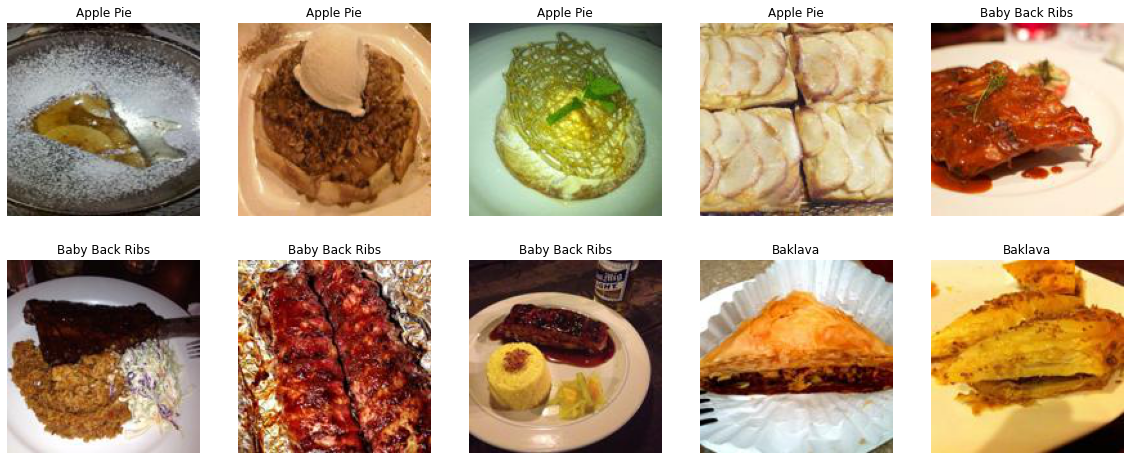

In [0]:
#Let's have a look at our food

import numpy as np # conda install numpy -y
import pandas as pd # conda install pandas -y
import matplotlib.pyplot as plt # conda install matplotlib -y
from skimage.io import imread # conda install scikit-image -y
import os
fig = plt.figure(figsize=(20, 8))
for i in range(10):
    filename, label = df_part.loc[i*250].File, df_part.loc[i*250].Food
    im = imread(filename)
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(im)
plt.show()

Information about classes:
[['Apple Pie' '1000']
 ['Baby Back Ribs' '1000']
 ['Baklava' '1000']
 ['Beef Carpaccio' '1000']
 ['Beef Tartare' '1000']
 ['Beet salad' '1000']]


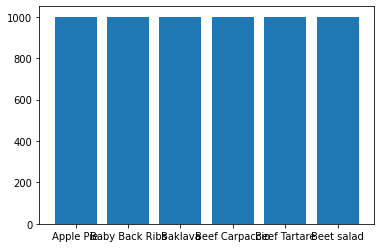

In [0]:
#Some information about classes
print('Information about classes:')

classes = np.unique(df_part.Food)
description = np.array([(c, np.sum(df_part.Food == c)) for c in classes])
print(description)

plt.bar(description[:,0], description[:,1].astype(np.int))
plt.show()


In [0]:
features

array([<built-in method flatten of numpy.ndarray object at 0x7face25f3f80>,
       <built-in method flatten of numpy.ndarray object at 0x7face27cdd00>,
       <built-in method flatten of numpy.ndarray object at 0x7face262e3f0>,
       ...,
       <built-in method flatten of numpy.ndarray object at 0x7face24c4d50>,
       <built-in method flatten of numpy.ndarray object at 0x7face24c4df0>,
       <built-in method flatten of numpy.ndarray object at 0x7face24c4e90>],
      dtype=object)

In [0]:
import pickle
#here we store this array of pixels

pickle_out = open("features_pixels_partial2.pickle","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

In [0]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df_part['Food']= label_encoder.fit_transform(df_part['Food']) 
  
y_unique = df_part['Food'].unique() 
y = df_part['Food']

Training set shape: (4800, 150, 150, 3)
Test set shape: (1200, 150, 150, 3)
168     0
5005    5
1642    1
4236    4
2597    2
Name: Food, dtype: int64


In [0]:
features.shape

(6000, 150, 150, 3)

In [0]:
c = features.reshape(6000,150*150*3)
c.shape

(6000, 67500)

In [0]:
from sklearn.model_selection import train_test_split
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(c, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))

print(y_train[:5])

Training set shape: (4800, 67500)
Test set shape: (1200, 67500)
168     0
5005    5
1642    1
4236    4
2597    2
Name: Food, dtype: int64


Model accuracy in training set: 0.7783333333333333


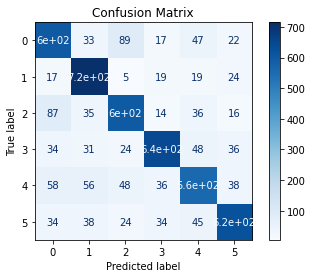

Model accuracy in test set: 0.4575


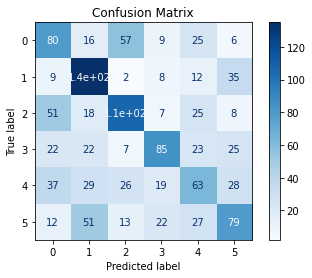

In [0]:
# SVM model (support vector machine)
# RF model (random forest)
# DT model (decision tree)
# NN model (neural network)
# DNN model (deep neural network)
# CNN model (convolutional neural network)

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(list(X_train), y_train) # Fitting the model

dump(model, 'svm_model_pixels.joblib') # saving model
model = load('svm_model_pixels.joblib') # loading model

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

In [0]:
from skimage import exposure, img_as_float # for histogram

nbins = 256
features2 = []
for filename in df_part.filename:
    im = imread(os.path.join(image_path, filename))
    im = img_as_float(im)
    features.append(np.stack([exposure.histogram(im[:,:,0])[0],
                             exposure.histogram(im[:,:,1])[0],
                             exposure.histogram(im[:,:,2])[0]]).flatten())

features = np.array(features)

In [0]:
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

In [0]:
# SVM model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(X_train, y_train) # Fitting the model

# saving trained model

dump(model, 'svm_model_histogram.joblib')
model = load('svm_model_histogram.joblib')

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()